# Pull Alpaca API data for ARKK holdings

In [39]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
import numpy as np

In [127]:
from mcforecast import MCSimulation

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
print(alpaca)

## ARK ETF - Alpaca Data Pull

In [6]:
ARK_ETF = ["TSLA", "ROKU", "TDOC", "MSTR", "SQ", "SHOP", "TTWO", "TWLO", "SPOT", "NTLA", "CRSP", "EXAS", "Z", "TWTR", "TER", "DOCU", "CGEN"]

In [7]:
timeframe = "1D"

In [8]:
start_date = pd.Timestamp("2018-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-01", tz="America/New_York").isoformat()

In [9]:
 ## This code artificially creates 3 years -- could replace code in line 8 --

In [10]:
# today = datetime.now()
# startdate = today - timedelta(days=3*365)

In [11]:
# this is to convert the datetime format to the pd.Timestamp that alpaca api syntax requirement

In [12]:
# end_date = pd.Timestamp(today.strftime("%Y-%m-%d"), tz="America/New_York").isoformat()
# start_date = pd.Timestamp(startdate.strftime("%Y-%m-%d"), tz="America/New_York").isoformat()

In [13]:
ARK_ETF_portfolio = alpaca.get_barset(
    ARK_ETF,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

In [14]:
ARK_ETF_portfolio.head()

CGEN                               CRSP         \
                           open  high   low close    volume   open   high   
time                                                                        
2018-09-04 00:00:00-04:00  3.90  4.00  3.75  3.90  117029.0  58.50  59.00   
2018-09-05 00:00:00-04:00  3.80  3.95  3.80  3.95  115535.0  55.50  55.50   
2018-09-06 00:00:00-04:00  3.90  3.95  3.65  3.95  200494.0  53.17  53.72   
2018-09-07 00:00:00-04:00  3.95  3.95  3.75  3.85  176952.0  50.00  51.73   
2018-09-10 00:00:00-04:00  3.95  4.00  3.85  3.95  159873.0  50.66  50.85   

                                                   ...   TWTR          \
                              low  close   volume  ...   open    high   
time                                               ...                  
2018-09-04 00:00:00-04:00  53.600  55.50  1032358  ...  34.75  35.125   
2018-09-05 00:00:00-04:00  52.005  53.44   606929  ...  34.65  34.700   
2018-09-06 00:00:00-04:00  49.580  49.84   558842  ...  32.86  32.950   
2018-09-07 00:00:00-04:00  49.360  50.12   431793  ...  30.31  31.390   
2018-09-10 00:00:00-04:00  47.500  49.67  1106214  ...  30.50  30.600   

                                                           Z                 \
                               low  close      volume   open    high    low   
time                                                                          
2018-09-04 00:00:00-04:00  34.4800  34.84  12200652.0  48.55  48.900  47.56   
2018-09-05 00:00:00-04:00  32.5100  32.73  32198973.0  47.82  48.270  46.91   
2018-09-06 00:00:00-04:00  30.6200  30.82  33189835.0  47.68  47.980  43.87   
2018-09-07 00:00:00-04:00  29.8200  30.49  28893185.0  44.58  46.115  44.52   
2018-09-10 00:00:00-04:00  29.9531  30.54  15451664.0  45.00  46.200  44.60   

                                           
                           close   volume  
time                                       
2018-09-04 00:00:00-04:00  47.72  1177704  
2018-09-05 00:00:00-04:00  47.67  1171127  
2018-09-06 00:00:00-04:00  44.62  2537771  
2018-09-07 00:00:00-04:00  44.93  1830479  
2018-09-10 00:00:00-04:00  46.12  1103775  

[5 rows x 85 columns]

In [15]:
# adding a daily returns column for ARK ETF
ARK_closing_prices = pd.DataFrame()

# Fetch the closing prices of ARK etf stocks
ARK_closing_prices["TSLA"] = ARK_ETF_portfolio["TSLA"]["close"]
ARK_closing_prices["ROKU"] = ARK_ETF_portfolio["ROKU"]["close"]
ARK_closing_prices["TDOC"] = ARK_ETF_portfolio["TDOC"]["close"]
ARK_closing_prices["MSTR"] = ARK_ETF_portfolio["MSTR"]["close"]
ARK_closing_prices["SQ"] = ARK_ETF_portfolio["SQ"]["close"]
ARK_closing_prices["SHOP"] = ARK_ETF_portfolio["SHOP"]["close"]
ARK_closing_prices["TTWO"] = ARK_ETF_portfolio["TTWO"]["close"]
ARK_closing_prices["TWLO"] = ARK_ETF_portfolio["TWLO"]["close"]
ARK_closing_prices["SPOT"] = ARK_ETF_portfolio["SPOT"]["close"]
ARK_closing_prices["NTLA"] = ARK_ETF_portfolio["NTLA"]["close"]
ARK_closing_prices["CRSP"] = ARK_ETF_portfolio["CRSP"]["close"]
ARK_closing_prices["EXAS"] = ARK_ETF_portfolio["EXAS"]["close"]
ARK_closing_prices["Z"] = ARK_ETF_portfolio["Z"]["close"]
ARK_closing_prices["TWTR"] = ARK_ETF_portfolio["TWTR"]["close"]
ARK_closing_prices["TER"] = ARK_ETF_portfolio["TER"]["close"]
ARK_closing_prices["DOCU"] = ARK_ETF_portfolio["DOCU"]["close"]
ARK_closing_prices["CGEN"] = ARK_ETF_portfolio["CGEN"]["close"]



# Drop the time component of the date
ARK_closing_prices.index = ARK_closing_prices.index.date

# Compute daily returns
ARK_daily_returns = ARK_closing_prices.pct_change().dropna()

# Display sample data
ARK_daily_returns.head(10)

,TSLA,ROKU,TDOC,MSTR,SQ,SHOP,TTWO,TWLO,SPOT,NTLA,CRSP,EXAS,Z,TWTR,TER,DOCU,CGEN
2018-09-05,-0.028691,-0.029123,-0.022756,-0.019695,-0.044603,-0.043463,-0.041921,-0.061775,-0.054018,-0.022446,-0.037117,-0.023322,-0.001048,-0.060563,-0.007280,-0.026084,0.012821
2018-09-06,0.001107,0.036844,-0.010996,-0.000207,0.015600,-0.041795,0.011249,-0.014931,-0.010879,-0.099501,-0.067365,-0.010026,-0.063982,-0.058356,-0.032022,-0.083360,0.000000
2018-09-07,-0.063235,0.025314,0.007848,0.000069,0.016038,0.048688,0.001534,0.022860,0.014190,0.006282,0.005618,0.029051,0.006948,-0.010707,0.002778,-0.015387,-0.025316
2018-09-10,0.084410,0.053719,0.001622,0.013948,-0.006336,0.010523,-0.010647,0.024050,0.025399,-0.008814,-0.008978,-0.015929,0.026486,0.001640,-0.006547,-0.053029,0.025974
2018-09-11,-0.021124,0.032992,0.012634,0.008308,0.032330,0.039401,0.036931,0.011624,0.000329,0.080030,0.043286,-0.001053,0.021899,0.011624,-0.022814,0.000742,-0.012658
2018-09-12,0.039831,-0.000141,-0.015355,0.006214,-0.019939,0.036756,-0.003509,-0.003283,0.006464,0.038079,0.036858,-0.006192,0.008487,-0.037061,-0.048249,0.059848,-0.025641
2018-09-13,-0.003923,-0.005147,0.010396,-0.006914,-0.002543,0.015474,0.021355,0.003411,0.005661,0.023794,0.008189,0.017630,-0.019777,0.021176,0.019624,-0.031643,0.026316
2018-09-14,0.019660,0.007298,-0.005788,0.007165,0.006651,-0.004887,-0.016140,0.023212,-0.022407,0.002260,0.021599,-0.006383,-0.000859,-0.008558,0.003742,-0.029247,0.000000
2018-09-17,-0.001084,-0.019263,-0.034929,-0.012818,-0.043497,-0.007366,-0.019611,-0.032310,-0.029897,-0.038647,-0.090658,-0.038804,-0.049409,-0.041999,-0.008788,-0.029570,-0.025641
2018-09-18,-0.033448,0.033262,0.031501,0.019035,0.012779,0.056304,0.008975,0.011011,0.001541,0.071357,0.056575,-0.007638,0.008814,0.012649,0.006985,0.018015,0.006579


In [33]:
#Calculating cumilative returns for ARK
ARK_cum_returns = (1+ ARK_daily_returns).cumprod()
ARK_cum_returns.head()

,TSLA,ROKU,TDOC,MSTR,SQ,SHOP,TTWO,TWLO,SPOT,NTLA,CRSP,EXAS,Z,TWTR,TER,DOCU,CGEN
2018-09-05,0.971309,0.970877,0.977244,0.980305,0.955397,0.956537,0.958079,0.938225,0.945982,0.977554,0.962883,0.976678,0.998952,0.939437,0.992720,0.973916,1.012821
2018-09-06,0.972385,1.006648,0.966498,0.980102,0.970301,0.916558,0.968857,0.924216,0.935690,0.880286,0.898018,0.966886,0.935038,0.884615,0.960932,0.892730,1.012821
2018-09-07,0.910897,1.032130,0.974083,0.980169,0.985863,0.961184,0.970343,0.945344,0.948968,0.885817,0.903063,0.994975,0.941534,0.875144,0.963601,0.878994,0.987179
2018-09-10,0.987785,1.087575,0.975664,0.993841,0.979616,0.971298,0.960012,0.968079,0.973071,0.878009,0.894955,0.979126,0.966471,0.876579,0.957292,0.832382,1.012821
2018-09-11,0.966919,1.123457,0.987990,1.002098,1.011288,1.009567,0.995466,0.979332,0.973391,0.948276,0.933694,0.978096,0.987636,0.886768,0.935453,0.832999,1.000000


In [44]:
#calculate ARK avg returns
ARK_avg_returns = ARK_daily_returns.mean() * 252
ARK_avg_returns.head()

TSLA    0.784559
ROKU    0.932080
TDOC    0.397589
MSTR    0.721981
SQ      0.528540
dtype: float64

In [43]:
#calculate standard deviation of ARK
ARK_Std_Deviation = ARK_daily_returns.std()
ARK_Std_Deviation.head()

TSLA    0.052195
ROKU    0.046712
TDOC    0.037817
MSTR    0.042713
SQ      0.037968
dtype: float64

In [42]:
#ARK Annual STD
ARK_Annual_STD = ARK_Std_Deviation * np.sqrt(252)
ARK_Annual_STD.head()

TSLA    0.828566
ROKU    0.741525
TDOC    0.600329
MSTR    0.678055
SQ      0.602726
dtype: float64

In [46]:
#Calculating Sharpe Ratio: Helps quanitfy both risk & potential return of an investment
ARK_Sharpe_Ratio = ARK_avg_returns / ARK_Annual_STD
ARK_Sharpe_Ratio.sort_values()

SPOT    0.379425
TTWO    0.421521
EXAS    0.482364
CGEN    0.631598
TDOC    0.662286
TWTR    0.722355
CRSP    0.732224
Z       0.750323
SQ      0.876917
TSLA    0.946887
NTLA    1.030470
MSTR    1.064783
TER     1.074286
TWLO    1.097571
DOCU    1.244727
ROKU    1.256978
SHOP    1.691027
dtype: float64

In [18]:
## saving ARK_ETF_portfolio to csv
ARK_ETF_portfolio.to_csv("Ark_ETF.csv")

In [19]:
## saving ARK daily returns to a csv
ARK_daily_returns.to_csv("ARK_daily_returns.csv")

### Competitors - Alpaca Data Pull

In [20]:
competitors_df = ["NIO", "NFLX", "PFE", "MSFT", "V", "PYPL", "CRM", "ATVI", "VG", "TTD", "IONS", "NVAX", "AMGN", "RDFN", "SNAP"]

In [21]:
timeframe = "1D"

In [22]:
start_date = pd.Timestamp("2018-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-01", tz="America/New_York").isoformat()

In [23]:
 ## This code artificially creates 3 years -- could replace code in line 16 --

In [24]:
today = datetime.now()
startdate = today - timedelta(days=3*365)

In [25]:
end_date = pd.Timestamp(today.strftime("%Y-%m-%d"), tz="America/New_York").isoformat()
start_date = pd.Timestamp(startdate.strftime("%Y-%m-%d"), tz="America/New_York").isoformat()

In [26]:
competitors_list = alpaca.get_barset(
    competitors_df,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

In [27]:
competitors_list.head()

AMGN                                        ATVI  \
                             open      high       low   close   volume   open   
time                                                                            
2018-08-20 00:00:00-04:00  197.89  198.5000  196.8700  197.54  1200772  69.21   
2018-08-21 00:00:00-04:00  197.93  198.4000  196.7300  197.32  1212006  69.27   
2018-08-22 00:00:00-04:00  197.15  198.7500  195.8337  197.86  1452849  69.58   
2018-08-23 00:00:00-04:00  197.37  197.7499  195.6200  196.61   945864  71.56   
2018-08-24 00:00:00-04:00  196.88  197.5000  195.5954  196.66   873402  71.71   

                                                              ...       V  \
                             high      low  close     volume  ...    open   
time                                                          ...           
2018-08-20 00:00:00-04:00  69.390  68.2200  68.94  3761930.0  ...  141.54   
2018-08-21 00:00:00-04:00  70.260  69.0400  69.67  4748136.0  ...  141.00   
2018-08-22 00:00:00-04:00  71.520  69.5001  71.43  7029012.0  ...  139.85   
2018-08-23 00:00:00-04:00  71.895  70.5100  71.17  6437106.0  ...  141.01   
2018-08-24 00:00:00-04:00  74.160  71.4600  74.08  7745823.0  ...  142.32   

                                                                 VG           \
                               high     low   close   volume   open     high   
time                                                                           
2018-08-20 00:00:00-04:00  141.6000  140.70  140.94  2815641  14.57  14.6115   
2018-08-21 00:00:00-04:00  141.4574  139.80  140.02  3455094  14.53  14.5500   
2018-08-22 00:00:00-04:00  141.5300  139.85  141.15  2981091  14.27  14.4100   
2018-08-23 00:00:00-04:00  142.4450  140.77  142.09  3081943  14.33  14.3700   
2018-08-24 00:00:00-04:00  144.3800  142.32  144.21  4113601  14.23  14.3200   

                                                    
                             low   close    volume  
time                                                
2018-08-20 00:00:00-04:00  14.30  14.485  598652.0  
2018-08-21 00:00:00-04:00  14.30  14.300  942216.0  
2018-08-22 00:00:00-04:00  14.14  14.340  743927.0  
2018-08-23 00:00:00-04:00  14.21  14.250  733230.0  
2018-08-24 00:00:00-04:00  14.17  14.265  482420.0  

[5 rows x 75 columns]

In [28]:
## saving competitors_portfolio to csv

In [29]:
competitors_list.to_csv("competitors_list.csv")

In [30]:
# adding a daily returns column
Comp_closing_prices = pd.DataFrame()

# Fetch the closing prices of Competitors list
Comp_closing_prices["NIO"] = competitors_list["NIO"]["close"]
Comp_closing_prices["NFLX"] = competitors_list["NFLX"]["close"]
Comp_closing_prices["PFE"] = competitors_list["PFE"]["close"]
Comp_closing_prices["MSFT"] = competitors_list["MSFT"]["close"]
Comp_closing_prices["V"] = competitors_list["V"]["close"]
Comp_closing_prices["PYPL"] = competitors_list["PYPL"]["close"]
Comp_closing_prices["CRM"] = competitors_list["CRM"]["close"]
Comp_closing_prices["ATVI"] = competitors_list["ATVI"]["close"]
Comp_closing_prices["VG"] = competitors_list["VG"]["close"]
Comp_closing_prices["TTD"] = competitors_list["TTD"]["close"]
Comp_closing_prices["IONS"] = competitors_list["IONS"]["close"]
Comp_closing_prices["NVAX"] = competitors_list["NVAX"]["close"]
Comp_closing_prices["AMGN"] = competitors_list["AMGN"]["close"]
Comp_closing_prices["RDFN"] = competitors_list["RDFN"]["close"]
Comp_closing_prices["SNAP"] = competitors_list["SNAP"]["close"]


# Drop the time component of the date
Comp_closing_prices.index = Comp_closing_prices.index.date

# Compute daily returns
Comp_daily_returns = Comp_closing_prices.pct_change().dropna()

# Display sample data
Comp_daily_returns.head(10)

,NIO,NFLX,PFE,MSFT,V,PYPL,CRM,ATVI,VG,TTD,IONS,NVAX,AMGN,RDFN,SNAP
2018-09-13,0.687879,-0.004811,0.010849,0.011104,0.007163,-0.002381,0.018278,-0.001118,-0.018815,-0.001440,0.001332,-0.017123,0.017193,-0.050101,0.016304
2018-09-14,-0.110853,-0.009860,0.002566,0.003897,0.001422,-0.015403,-0.004614,0.010318,0.010653,0.003159,0.019956,-0.017422,-0.011580,0.028237,-0.006417
2018-09-17,-0.141846,-0.038843,0.000931,-0.010322,-0.011228,-0.023356,-0.016318,-0.029408,-0.014055,-0.023480,0.046522,-0.021277,0.001147,-0.005181,-0.013423
2018-09-18,-0.095305,0.049289,0.011858,0.009271,0.010056,0.012183,0.007036,0.009508,-0.001426,0.014581,0.025343,0.007246,0.007619,0.008854,-0.005488
2018-09-19,0.105332,-0.002059,-0.005744,-0.013425,-0.001219,-0.004681,-0.019935,-0.000753,-0.049251,0.000967,0.012358,0.021583,0.004250,-0.016520,0.004388
2018-09-20,0.030588,-0.004206,0.011324,0.016831,0.012070,0.014332,0.017135,0.013573,0.020270,-0.011182,0.016610,0.035211,0.009744,-0.023885,0.006008
2018-09-21,-0.020856,-0.011961,0.006627,0.010829,0.004556,0.001325,-0.000707,-0.004588,0.000000,-0.009773,-0.033071,0.081633,-0.000439,-0.037376,-0.008686
2018-09-24,-0.081296,0.023852,-0.002724,-0.001219,-0.005536,-0.011906,0.021685,0.004111,0.019868,-0.017836,0.028094,0.163522,0.010337,0.019553,-0.019715
2018-09-25,-0.038071,-0.000785,-0.002959,-0.001831,0.003152,0.004463,0.000441,-0.001241,0.033911,0.109747,0.020198,0.075676,-0.003620,0.012055,0.011732
2018-09-26,-0.010554,0.023558,-0.002055,-0.002883,-0.001538,-0.001999,-0.003274,0.013166,0.001396,0.007438,-0.002135,-0.075377,0.001792,-0.001624,-0.007178


In [32]:
#Calculating cumilative returns for ARK
COMP_cum_returns = (1+ Comp_daily_returns).cumprod()
COMP_cum_returns

,NIO,NFLX,PFE,MSFT,V,PYPL,CRM,ATVI,VG,TTD,IONS,NVAX,AMGN,RDFN,SNAP
2018-09-13,1.687879,0.995189,1.010849,1.011104,1.007163,0.997619,1.018278,0.998882,0.981185,0.998560,1.001332,0.982877,1.017193,0.949899,1.016304
2018-09-14,1.500773,0.985376,1.013443,1.015044,1.008596,0.982253,1.013580,1.009189,0.991638,1.001714,1.021314,0.965753,1.005414,0.976721,1.009783
2018-09-17,1.287894,0.947101,1.014387,1.004567,0.997271,0.959312,0.997040,0.979511,0.977700,0.978194,1.068828,0.945205,1.006566,0.971660,0.996228
2018-09-18,1.165152,0.993783,1.026415,1.013880,1.007300,0.970999,1.004055,0.988824,0.976307,0.992457,1.095915,0.952055,1.014236,0.980263,0.990761
2018-09-19,1.287879,0.991737,1.020519,1.000269,1.006072,0.966454,0.984039,0.988079,0.928223,0.993417,1.109458,0.972603,1.018546,0.964069,0.995109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,6.663636,1.385052,1.091981,2.569893,1.603561,2.991451,1.559403,1.055631,0.953310,0.565343,0.848579,160.479452,1.143609,2.787449,8.316304
2021-08-12,6.437879,1.379997,1.114151,2.593803,1.581525,2.971540,1.598597,1.057618,0.942160,0.586916,0.873224,169.342466,1.143609,2.841599,8.180435
2021-08-13,6.215152,1.394540,1.143550,2.622549,1.587393,2.974894,1.618999,1.041227,0.937282,0.554481,0.881439,176.027397,1.151178,2.704453,8.110870
2021-08-16,5.854545,1.400108,1.153774,2.638668,1.605608,3.011362,1.603874,1.041103,0.922648,0.541521,0.857682,157.116438,1.158296,2.495445,7.875000


In [93]:
#saving the daily returns DF to a CSV
Comp_daily_returns.to_csv("Competitors Daily Returns")

In [122]:
#Adding portfolio weights
# ARK_weight = {
#     "TSLA": 0.17,
#     "ROKU": 0.08,
#     "TDOC": 0.057,
#     "MSTR": 0.11,
#     "SQ": 0.057,
#     "SHOP": 0.043,
#     "TTWO": 0.04,
#     "TWLO": 0.0368,
#     "SPOT": 0.0535,
#     "NTLA": 0.0301,
#     "CRSP": 0.0526,
#     "EXAS": 0.048,
#     "Z": 0.052,
#     "TWTR": 0.043,
#     "TER": 0.02,
#     "DOCU": 0.082,
#     "CGEN": 0.025
# }

ARK_weight = [0.17, 0.08, 0.057, 0.11, 0.057, 0.043, 0.04, 0.0368, 0.0535, 0.0301, 0.0526, 0.048, 0.052, 0.043, 0.02, 0.082, 0.025]

portfolio_returns = ARK_daily_returns.dot(ARK_weight)
portfolio_returns.head()

2018-09-05   -0.030292
2018-09-06   -0.019435
2018-09-07   -0.003659
2018-09-10    0.018299
2018-09-11    0.011704
dtype: float64

In [123]:
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

2018-09-05    0.969708
2018-09-06    0.950861
2018-09-07    0.947382
2018-09-10    0.964718
2018-09-11    0.976008
dtype: float64

<AxesSubplot:title={'center':'ARK Porfolio Returns'}>

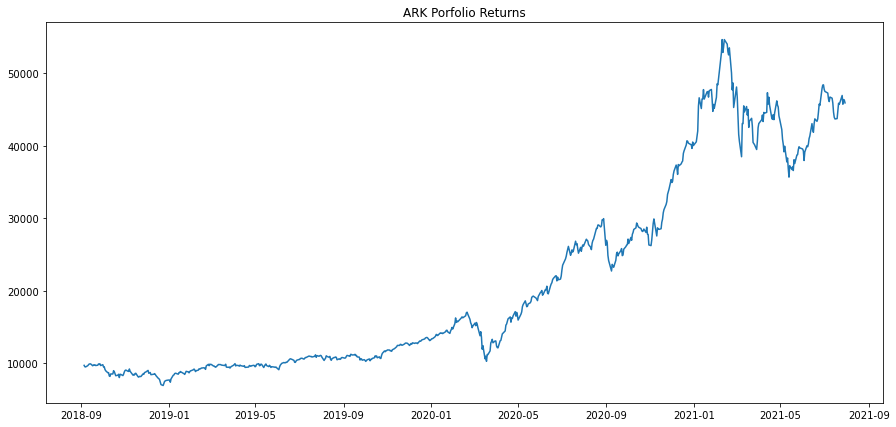

In [125]:
Initial_Investment = 10000
Cumulative_Profits = Initial_Investment * cumulative_returns
Cumulative_Profits.plot(title="ARK Porfolio Returns, previous 35 months", figsize=(15,7))

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

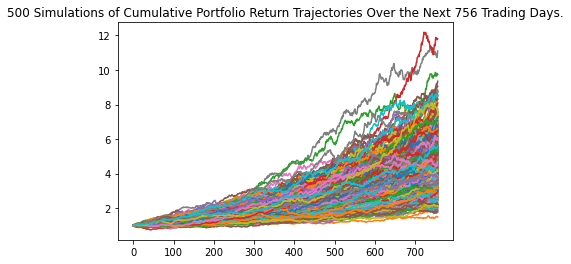

In [146]:
MC_threeyear = MCSimulation(
           portfolio_data = ARK_ETF_portfolio,
           weights = [0.17, 0.08, 0.057, 0.11, 0.057, 0.043, 0.04, 0.0368, 0.0535, 0.0301, 0.0526, 0.048, 0.052, 0.043, 0.02, 0.082, 0.025],
           num_simulation = 500,
           num_trading_days = 252*3  
)
# Run a monte carlo to forecast 3 years cumulative returns
MC_threeyear.portfolio_data.head()

# Plot simulation outcomes
MC_threeyear.calc_cumulative_return()

#Plot probability distribution and confidence intervals
MC_sim_line_plot = MC_threeyear.plot_simulation()



<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

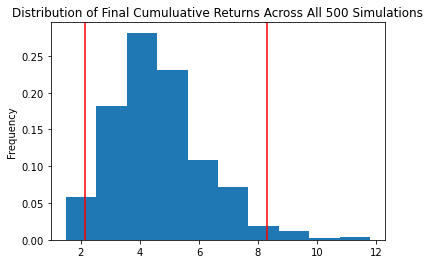

In [147]:
MC_threeyear.plot_distribution()

In [157]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_threeyear.simulated_return.mean(axis=1)),
    "median": list(MC_threeyear.simulated_return.median(axis=1)),
    "min": list(MC_threeyear.simulated_return.min(axis=1)),
    "max": list(MC_threeyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001916,1.002511,0.961744,1.042692
2,1.003909,1.003782,0.957890,1.060105
3,1.005474,1.004493,0.950364,1.067467
4,1.006724,1.005768,0.921300,1.078247


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of ARK Stock Over the Next 3 Year'}>

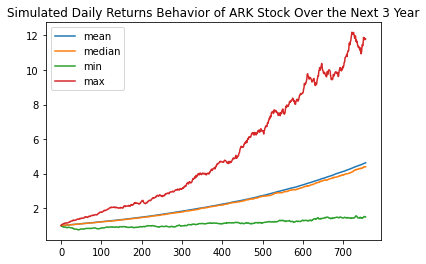

In [162]:
# Use the `plot` function to visually analyze the trajectory of ARK ETF daily returns on a 3 year trading day simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of ARK Stock Over the Next 3 Year")

In [158]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10019.160516,10025.110226,9617.437969,10426.917076
2,10039.089626,10037.820025,9578.902017,10601.049884
3,10054.741484,10044.925595,9503.640267,10674.670919
4,10067.237240,10057.675070,9213.004342,10782.472052


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of ARK ETF Over the Next 3 Year'}>

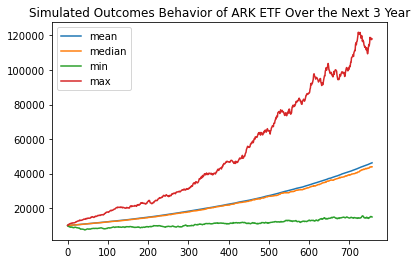

In [164]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of ARK ETF Over the Next 3 Year")

In [150]:
tbl = MC_threeyear.summarize_cumulative_return()
print(tbl)

count           500.000000
mean              4.627742
std               1.563510
min               1.493983
25%               3.562763
50%               4.398729
75%               5.440437
max              11.793448
95% CI Lower      2.157729
95% CI Upper      8.313668
Name: 756, dtype: float64


In [152]:
# Use the lower and upper 95% confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in ARK stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next three years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next three years will end within in the range of $21577.29 and $83136.68.


In [ ]:
#QUESTIONARY

In [ ]:
#tickers to remove: alt_stock_1_q, alt_stock_2_q
#tickers to swap with: alt_stock_1_a, alt_stock_2_a
